# Sympy官方教程

本文取自[CSDN的zt_706翻译](http://blog.csdn.net/zt_706/article/details/11475893)的[官方教程](http://docs.sympy.org/latest/tutorial/index.html) ，并加入了一些我自己的理解，后面会对各个章节进行细化。

## 引言

SymPy是一个符号数学Python库。它的目标是成为一个全功能的计算机代数系统，同时保持代码的精简而易于理解和课扩展。SymPy完全由Python写成，不需要任何外部库。

这个教程概述和简介SymPy。阅读它能让你知道SymPy可以为你做什么。如果你想了解更多，阅读SymPy用户指南和SymPy模块参考。或者直接阅读源码。

## SymPy第一步

下载它最简单的方法是通过pip直接下载：

```
pip install sympy
```

## 用SymPy做计算器

初中生们有福了（当然，你得会用python），SymPy有三种内建的数值类型：浮点数、有理数和整数。所以初中的家庭作业也许可以拿来耍一耍。

有理数类(Rational)用一对整数表示一个有理数：分子和分母，所以Rational(1,2)代表1/2,Rational(5,2)代表5/2等等。

In [1]:
# 使用Python3中的除法，即整数相除保留小数
from __future__ import division
from sympy import *
# 让jupyter打印sympy时，使用LATEX美化公式
init_printing(use_unicode='utf-8')
# 定义有理数
a = Rational(1,2)
a

In [2]:
print '有理数a中，分子是%i,分母是%i'%(a.p,a.q)

有理数a中，分子是1,分母是2


In [3]:
# 大数有理数计算 
Rational(2)**50/Rational(10)**50

In [4]:
# Sympy中定义了常用的数学常数，比方说圆周率pi:
pi

In [5]:
# 老师说Pi是无理数，我们试一下
Rational(pi)
# 预计会输出：TypeError: invalid input: pi，
# 看来sympy也觉得Pi不是有理数呢

TypeError: invalid input: pi

这些特殊的常数，像e和pi，它们被视为符号(1+pi)将不被数值求解，它将保持为(1+pi)，并且我们可以有任意精度。

In [6]:
pi**2

In [7]:
exp(1) -1

那么万一我们需要一个数值解呢？，很简单，sympy为我们提供了计算数值解的方法：

In [8]:
exp(1).evalf()

In [9]:
(pi - 3).evalf()

就像你看到的，evalf将表达式求解为浮点数。

这还有一个类表示数学上的无限(高等数学会正经讲极限，高中数学会考😭)，叫作oo（两个字母‘o’）：

In [10]:
oo > 99999

In [11]:
oo + 1

## 符号
和其它计算机代数系统相比，在SymPy中你不得不显式地声明符号变量：

In [12]:
x = Symbol('x')
y = Symbol('y')
# 然后你可以使用它们：
x+y+x-y

In [13]:
(x+y)**2

In [14]:
# 还记得二项式定力吗？sympy可以计算展开式
((x+y)**2).expand()

In [15]:
# 符号我们还可以批量定义：
x,y,z = symbols('x,y,z')
# 还可以这么定义：
k,m,l = S('k,m,l')

In [16]:
((x+y*3+z/2)**2)

In [17]:
((x+y*3+z/2)**2).expand()

In [18]:
# 又有好多家庭作业可以无脑求解了
Eq(m,((x+y*3+z/2)**2).expand())

## 代数（Algebra）
对部分分式分解，使用apart(expr, x)：

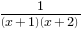

In [19]:
1/((x+2)*(x+1))

In [20]:
apart(1/((x+2)*(x+1)), x)

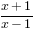

In [21]:
(x+1)/(x-1)

In [22]:
# 以后写作业完全可以无脑解决了啊！
apart((x+1)/(x-1), x)

In [23]:
# 分式结合该怎么办？快试试together
together(1/x + 1/y + 1/z)

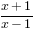

In [24]:
together(apart((x+1)/(x-1)))

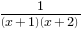

In [25]:
together(apart(1/( (x+2)*(x+1) )))

以上就是能够解决很多初高中代数作业的计算功能了，下面会介绍一些高数、线代里的功能，警告，前方高能⚠️

## 演算
### 极限
极限在sympy中使用很简单，它们的语法是limit(function, variable, point)，所以计算当x趋近于0时f(x)的极限，你可以给出limit(f, x, 0)：

In [26]:
# 极限表达式，第一个参数为求极限的函数或表达式，
# 第二个参数是变量，第三个是趋近于某个值
limit(x + 3, x, 0)

比如，两个重要极限：

In [27]:
limit((1+1/x)**x,x,oo)

In [28]:
limit(sin(x)/x,x,0)

对于一些不寻常的极限例子，你可以阅读这个测试文件[test_demidovich.py](https://github.com/sympy/sympy/blob/master/sympy/series/tests/test_demidovich.py)

### 微分（求导）
你可以使用diff(func, var)微分任何SymPy表达式。例如：

In [29]:
diff(sin(x), x)

In [30]:
diff(sin(2*x), x)

In [31]:
diff(tan(x), x)

高阶微分可以使用diff(func, var, n)来计算：


In [32]:
diff(sin(2*x), x, 1)

In [33]:
diff(sin(2*x), x, 2)

In [34]:
diff(sin(2*x), x, 3)

### 级数展开
使用.series(var, point, order):

In [35]:
cos(x).series(x, 0, 10)

In [36]:
(1/cos(x)).series(x, 0, 10)

In [37]:
# 另一个简单的例子：
e = 1/(x + y)
pprint(e)
pprint('展开后：')
s = e.series(x, 0, 5)
pprint(s)

  1  
─────
x + y
展开后：
          2    3    4        
1   x    x    x    x     ⎛ 5⎞
─ - ── + ── - ── + ── + O⎝x ⎠
y    2    3    4    5        
    y    y    y    y         


### 求和
计算给定求和变量界限的f的总和(Summation)。

summation(f, (i, a, b))变量i从a到b计算f的和，也就是：

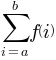

In [38]:
f,i,a,b = S('f(i),i,a,b')
summation(f, (i, a, b))

数列求和：

In [39]:
i, n, m = symbols('i n m', integer=True)
summation(2*i - 1, (i, 1, n))

In [40]:
summation(1/2**i, (i, 0, oo))

如果不能计算总和，它将打印相应的求和公式。求值可引入额外的极限计算：

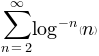

In [ ]:
summation(1/log(n)**n, (n, 2, oo))

In [ ]:
# 来个带阶乘的：
a_n = x**n/factorial(n)
pprint(a_n)
summation(a_n, (n, 0, oo))

### 积分
通过integrate()功能(facility)，SymPy对基本和特殊函数定与不定积分有卓越的支持。 该功能使用有力的扩展Risch-Norman算法，启发算法和模式匹配：

In [ ]:
# 不定积分
integrate(6*x**5, x)

In [ ]:
integrate(sin(x))

In [ ]:
# 对哪个变量求，需要在后面指定
integrate(sin(x)*y,x)

In [ ]:
integrate(log(x), x)

In [ ]:
integrate(2*x + sinh(x), x)

In [ ]:
# 特殊函数也可以简单的处理
# (erf貌似是误差函数，先不管它，就当是个高大上的函数)：
integrate(exp(-x**2)*erf(x), x)

In [ ]:
# 定积分来了：
pprint(integrate(x**3, (x, -1, 1)))
pprint(integrate(sin(x), (x, 0, pi/2)))
pprint(integrate(cos(x), (x, -pi/2, pi/2)))

In [ ]:
# 反常积分
integrate(exp(-x), (x, 0, oo))

In [ ]:
integrate(log(x), (x, 0, 1))

### 复数
除了复数单元I是虚数，符号可以被用属性创建(例如 real,positive,complex,等等)这将影响它们的表现：

In [ ]:
exp(I*x).expand()

In [ ]:
exp(I*x).expand(complex=True)

In [ ]:
x = Symbol('x', real=True)
exp(I*x).expand(complex=True)

### 函数
三角函数：

In [ ]:
x, y = symbols('x,y')
sin(x+y).expand(trig=True)

In [ ]:
cos(x+y).expand(trig=True)

In [ ]:
sin(I*x)

In [ ]:
sinh(I*x)

In [ ]:
asinh(I)

In [ ]:
asinh(I*x)

In [ ]:
sin(x).series(x, 0, 10)

In [ ]:
sinh(x).series(x, 0, 10)

In [ ]:
asin(x).series(x, 0, 10)

In [ ]:
asinh(x).series(x, 0, 10)

后面的一些函数没见过，就不列了，包括球谐函数，阶乘和伽马，zeta函数等等。后面用到再说。

### 微分方程
这货在大学困扰我很久，但在sympy可以无脑求解：

In [ ]:
f = Function('f')
x = Symbol('x')
# 二阶微分
f(x).diff(x,2) + f(x)

In [ ]:
# 微分方程求解：
dsolve(f(x).diff(x, x) + f(x), f(x)).ipynb_checkpoints/

### 代数方程
x, y = symbols('x,y')

In [ ]:
pprint('方程为：')
pprint(Eq(x**4 - 1,0))
pprint('所有解：')
solve(x**4 - 1, x,)

In [ ]:
pprint('方程组:')
pprint(Eq(x + 5*y - 2,0))
pprint(Eq(-3*x + 6*y - 15,0))
solve([x + 5*y - 2, -3*x + 6*y - 15], [x, y])

## 线性代数
### 矩阵
矩阵从Matrix类创建：

In [ ]:
Matrix([[1,0], [0,1]])

In [ ]:
# 还可以包含其他符号：
A = Matrix([[1,x], [y,1]])
A

In [ ]:
A**2

模式匹配和打印就先不列了，后面用到再补充。